In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds=pd.read_csv(r"/content/sample_data/Crude-Oil-Prices-Daily.csv",parse_dates
=["Date"], index_col ="Date")
ds.head()
ds[:10]


,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
1986-01-09,26.03
1986-01-10,25.65
1986-01-13,25.08
1986-01-14,24.97


In [ ]:
ds.isnull().sum()

Closing Value    7
dtype: int64

In [ ]:
ds.dropna(axis=0,inplace=True)
ds.isnull().sum()


Closing Value    0
dtype: int64

In [ ]:
data=ds.reset_index()['Closing Value']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))
data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

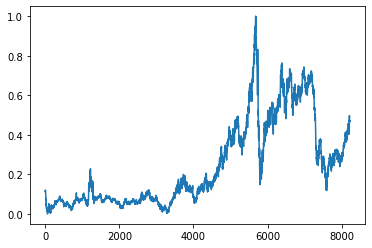

In [ ]:
plt.plot(data)

In [ ]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]
training_size,test_size

(5340, 2876)

In [ ]:
train_data.shape

(5340, 1)

In [22]:
def create_dataset(dataset,time_step=1):
 dataX,dataY=[],[]
 for i in range(len(dataset)-time_step-1):
  a=dataset[i:(i+time_step),0]
  dataX.append(a)
  dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)
  time_step=10
  x_train,y_train=create_dataset(train_data,time_step)
  x_test,y_test=create_dataset(test_data,time_step)
  print(x_train.shape)
  print(y_train.shape)

In [23]:
print(x_test.shape)
print(y_test.shape)

(1, 10)
(1,)


In [24]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, 0.11550422, 0.1156523 ,
        0.11683696, 0.1140234 , 0.10980305, 0.1089886 , 0.11054346]])

In [25]:
x_test


array([[0.38005331, 0.36872501, 0.37324152, 0.38205242, 0.38042352,
        0.36879905, 0.36050644, 0.3537687 , 0.35465719, 0.3499926 ]])

In [26]:
x_train1=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train1


array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        [0.11550422],
        [0.1156523 ],
        [0.11683696],
        [0.1140234 ],
        [0.10980305],
        [0.1089886 ],
        [0.11054346]]])

#Model building

#Importing model building libraries

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


#Initializing the model

In [28]:
model=Sequential()

#Adding LSTM and output layers

In [29]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()
Model: "sequential"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


#Configuring the learning process


In [30]:
model.compile(loss='mean_squared_error',optimizer='adam')


#Model training

In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)


Epoch 1/3
1/1 [==============================] - 9s 9s/step - loss: 0.0104 - val_loss: 0.1016
Epoch 2/3
1/1 [==============================] - 0s 70ms/step - loss: 0.0069 - val_loss: 0.0834
Epoch 3/3
1/1 [==============================] - 0s 85ms/step - loss: 0.0040 - val_loss: 0.0661


#Evaluation

In [33]:
train_predict=scaler.inverse_transform(train_data)
test_predict=scaler.inverse_transform(test_data)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

#Model saving


In [35]:
from tensorflow.keras.models import load_model
model.save("crude_oil.h5")


#Model testing

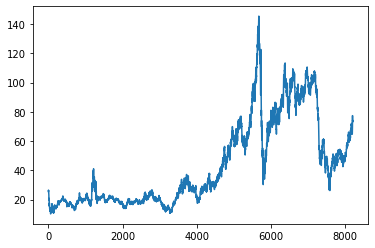

In [38]:
look_back=10
trainpredictPlot = np.empty_like(data)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] =train_predict
testPredictplot = np.empty_like(data)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
plt.plot(scaler.inverse_transform(data))
plt.show()


In [39]:
len(test_data)

2876

In [40]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [45]:
lst_output=[]
n_steps=10
i=0
while(i<10):
 if(len(temp_input)>10):
  x_input=np.array(temp_input[1:])
  print("{} day input {}".format(i,x_input))
  x_input=x_input.reshape(1,-1)
  x_input = x_input.reshape((1, n_steps, 1))
  yhat = model.predict(x_input, verbose=0)
  print("{} day output {}".format(i,yhat))
  temp_input.extend(yhat[0].tolist())
  temp_input=temp_input[1:]
  lst_output.extend(yhat.tolist())
  i=i+1
 else:
  x_input = x_input.reshape((1, n_steps,1))
  yhat = model.predict(x_input, verbose=0)
  print(yhat[0])
  temp_input.extend(yhat[0].tolist())
  print(len(temp_input))
  lst_output.extend(yhat.tolist())
  i=i+1

[0.10127048]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.10127048]
1 day output [[0.10113316]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.10127048 0.10113316]
2 day output [[0.09936024]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.10127048 0.10113316 0.09936024]
3 day output [[0.09623637]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.10127048 0.10113316 0.09936024 0.09623637]
4 day output [[0.09254901]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.10127048
 0.10113316 0.09936024 0.09623637 0.09254901]
5 day output [[0.08782628]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.10127048 0.10113316
 0.09936024 0.09623637 0.09254901 0.08782628]
6 day output [[0.08235267]]
7 day input [0.46497853 0.47038353 0.47149415 0.10127048 0.1011331

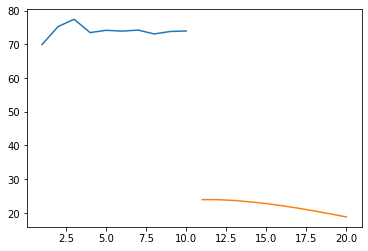

In [46]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)
len(data)
plt.plot(day_new, scaler.inverse_transform(data[8206:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


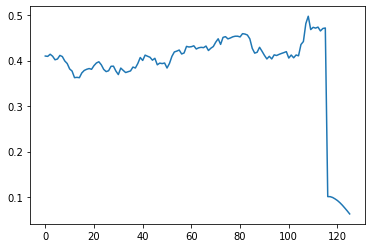

In [47]:
df3=data.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

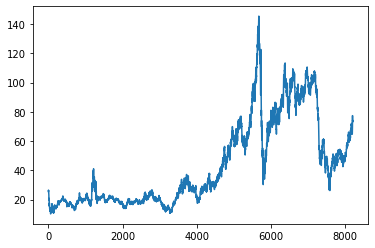

In [48]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(scaler.inverse_transform(data))
